<a id='sec_Notebooks_Medidas_II'></a> 
# Medidas II


$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\boldn}{{\bf n}} $
$ \newcommand{\tr}{{\rm tr}}$

## Índice

- **[Medidas de Pauli](#sec_Notebooks_Medidas_II_1)**
- **[Medidad Bell](#sec_Notebooks_Medidas_II_2)**
- **[Valor esperado de una cadena de Pauli](#sec_Notebooks_Medidas_II_3)**
- **[Medida de Hadamard](#sec_Notebooks_Medidas_II_4)**
    - **[Valor esperado de un operador a partir de $\langle X \rangle$ y $\langle Y \rangle$](#sec_Notebooks_Medidas_II_4.1)**

In [1]:
# Importamos las librerías y clases necesarias
import numpy as np
from qiskit.circuit import QuantumRegister, ClassicalRegister,QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.quantum_info import Statevector

# Import para visualización
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

In [2]:
# Importamos los simuladores. Con "method" le especificamos el método de simulación
simulador = AerSimulator(method = 'statevector')

<a id='sec_Notebooks_Medidas_II_1'></a>
## Medidas de Pauli


In [3]:
def add_Pauli_measurement(circuit,paulistring):
    
    assert(circuit.num_qubits==len(paulistring))
    
    len_string = len(paulistring)
    
    for i in range(len(paulistring)):
    #for i,basis in enumerate(paulistring)):
        if  paulistring[len_string -1 - i] == 'X':
            circuit.h(i)    
            circuit.measure(i, i)
        elif paulistring[len(paulistring) -1 - i] == 'Z':
            circuit.measure(i, i)
            pass    
        elif paulistring[len(paulistring) -1 - i] == 'Y':
            circuit.sdg(i)
            circuit.h(i)
            circuit.measure(i, i)
    return circuit



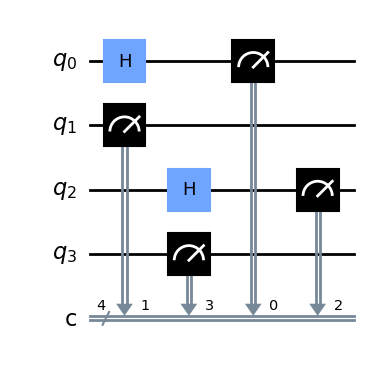

In [4]:
circuit_Pauli = QuantumCircuit(4,4)
add_Pauli_measurement(circuit_Pauli,'ZXZX')  # probar a cambiar el aparato de medida
circuit_Pauli.draw('mpl')

<a id='sec_Notebooks_Medidas_II_2'></a>
## Medidad Bell


In [5]:
def add_Bell_measurement(circuit):  
    circuit.cx(0,1)
    circuit.h(0)
    circuit.measure_all()
    
# definimos la base de Bell
B00 = np.array([1,0,0,1]/np.sqrt(2))
B01 = np.array([1,0,0,-1]/np.sqrt(2))
B10 = np.array([0,1,1,0]/np.sqrt(2))
B11 = np.array([0,1,-1,0]/np.sqrt(2))

In [6]:
# Definimos el registro
quantum_reg = QuantumRegister(2)

# creamos el circuito
circuit_bell         = QuantumCircuit(quantum_reg)
circuit_bell_measure = QuantumCircuit(quantum_reg)

##########################################
# Inicialización: Jugar a comentar y descomentar por pares

#circuit_bell.initialize(B00, quantum_reg)
#circuit_bell_measure.initialize(B00, quantum_reg)

#circuit_bell.initialize(B01, quantum_reg)
#circuit_bell_measure.initialize(B01, quantum_reg)

circuit_bell.initialize(B10, quantum_reg)
circuit_bell_measure.initialize(B10, quantum_reg)

#circuit_bell.initialize(B11, quantum_reg)
#circuit_bell_measure.initialize(B11, quantum_reg)

###########################################

# añadimos el medidor en la base de Bell
circuit_bell.measure_all()
add_Bell_measurement(circuit_bell_measure)

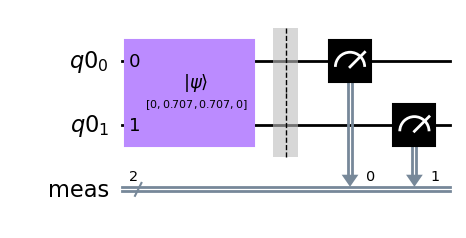

In [7]:
circuit_bell.draw('mpl')

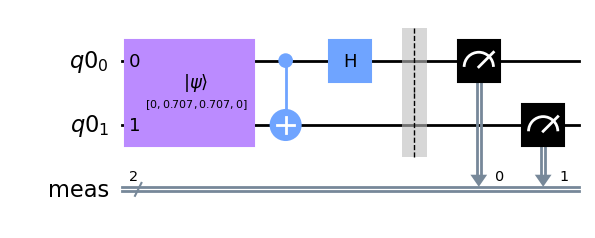

In [8]:
circuit_bell_measure.draw('mpl')

In [9]:
# transpilamos
t_circuit_bell = transpile(circuit_bell, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_bell = simulador.run(t_circuit_bell, shots = 1000).result()
counts_bell = result_bell.get_counts()
counts_bell

{'10': 514, '01': 486}

In [10]:
# transpilamos
t_circuit_bell_measure = transpile(circuit_bell_measure, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_bell_measure = simulador.run(t_circuit_bell_measure, shots = 1000).result()
counts_bell_measure = result_bell_measure.get_counts()
counts_bell_measure

{'10': 1000}

<a id='sec_Notebooks_Medidas_II_3'></a>
## Valor esperado de una cadena de Pauli

Veamos cómo calcular el valor esperado del operador

$$
\langle Z\otimes Z\otimes Z\rangle_\Psi  = \langle \Psi |   Z\otimes Z\otimes Z |\Psi \rangle
$$

en el siguiente estado

$$
|\psi> = \frac{i}{4}|000>+\frac{1}{\sqrt{8}}|001>+\frac{1+i}{4}|010>+\frac{1+2i}{\sqrt{8}}|101>+\frac{1}{4}|110>
$$

Primero lo inicializamos

In [11]:
input_vector = [1/4*1J,1/np.sqrt(8)*(1+0J),1/4*(1+1J),0,0,1/np.sqrt(8)*(1+2J),1/4,0]


# que normalizaremos a la unidad si es que no lo está ya
input_vector/=np.linalg.norm(input_vector)
print('norma=',np.linalg.norm(input_vector))

Statevector(input_vector).draw('latex')

norma= 1.0000000000000002


<IPython.core.display.Latex object>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $
$ \newcommand{\boldn}{{\bf n}} $
$ \newcommand{\tr}{{\rm tr}}$

Dado que $Z\ket{a} = (-1)^a\ket{a}$ donde $a=0,1$, entonces tendremos que, sobre un estado $\ket{abc}$ de la base computacional

$$
Z\otimes Z\otimes Z \ket{abc} = Z\ket{a}\otimes Z\ket{b}\otimes Z\ket{c} = (-1)^{a+b+c}\ket{abc}
$$

entonces el valor esperado  de este operador es
\begin{eqnarray}
\langle Z\otimes Z\otimes Z\rangle_\Psi &=&
\sum_{a,b,c=0,1} (-1)^{a+b+c} P(a,b,c) \nonumber\\ \rule{0mm}{10mm}
&=& \sum_{a,b,c=0,1}(-1)^{a+b+c}\big|\bra{abc}\Psi\rangle\big|^2 
\end{eqnarray}

El circuito que calcula las probabilidades necesarias es el siguiente

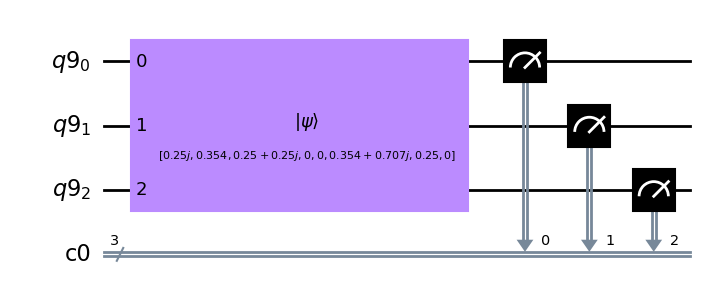

In [12]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc_Pauli = QuantumCircuit(qr,cr)

#from qiskit.extensions import Initialize

'initialize the circuit in the input_vector'
qc_Pauli.initialize(input_vector, qr)
#qc_Pauli.draw(output='mpl')
qc_Pauli.measure(qr,cr)
qc_Pauli.draw(output='mpl')

In [13]:
# transpilamos
t_qc_Pauli = transpile(qc_Pauli, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_qc_Pauli = simulador.run(qc_Pauli, shots = 10000).result()
counts_qc_Pauli = result_qc_Pauli.get_counts()
counts_qc_Pauli

{'010': 1304, '000': 633, '001': 1216, '101': 6190, '110': 657}

In [14]:
counts_qc_Pauli

{'010': 1304, '000': 633, '001': 1216, '101': 6190, '110': 657}

In [15]:
def probs_amps(cuentas): # frecuencias_dict es un diccionario con la estadística de resultados
    """
    Toma la cuentas (salida de results.get_counts()) y devuelve
    
        - Las distribuciones de probabilidades, es decir, 
          el número de cuentas de cada caso dividido entre 
          el total de cuentas.
        
        - Las amplitudes, es decir, las raices cruadradas de 
          las probabilidades
    
    Ambas las devuelve como diccionarios al igual que la entrada.       

    """
    prob_dict=cuentas.copy() # vamos a modificar el diccionario "cuentas" con las probabilidades 
    amp_dict=cuentas.copy()  # y las amplitudes
    keys = list(cuentas.keys())
    values = list(cuentas.values())
    
    N=sum(values)
    probabilidades = [v/N for v in values] # lista de frecuencias relativas
 
    for i in range(len(keys)):
        prob_dict[keys[i]]= probabilidades[i]
        amp_dict[keys[i]] = np.sqrt(probabilidades[i]) #las amplitudes, sólo en valor absoluto, las fases no son accesibles
    
    return  prob_dict, amp_dict



def val_esp_sigma(cuentas):
    probs, amps = probs_amps(cuentas)
#    print(probs)

    media = 0
    varianza = 0

    for bitstring,  prob  in probs.items():
        media += (-1)**(sum([int(bit) for bit in bitstring])) * prob 

    for bitstring,  prob  in probs.items():
        varianza += ((-1)**(sum([int(bit) for bit in bitstring]))-media)**2 * prob 
    
    sigma = np.round(np.sqrt(varianza),5)
    
    return media, sigma

In [16]:
valor_esperado, sigma = val_esp_sigma(counts_qc_Pauli)

print('<ZZZ> = ', np.round(valor_esperado,5), ' sigma= ', sigma)

<ZZZ> =  0.496  sigma=  0.86832


<div class="alert alert-block alert-success">
<p style="color: DarkGreen;">
<b>Ejercicio</b>:
<br>        
Calcula el valor esperado de $\langle X\otimes Y\otimes Z\rangle_\Psi$  
</div>

<div class="alert alert-block alert-success">
<p style="color: DarkGreen;">
<b>Ejercicio</b>:
<br>        
Considera el hamiltoniano $H=A(X X+Y Y+Z Z)$ siendo $A=1.47\cdot 10^{-6}eV$. 
 Calcular el valor esperado de la energía $E = \langle H\rangle_\Psi$  en los cuatro estados de Bell
$\ket{\Psi} = \ket{B_{ij}}$. 
</div>

<a id='sec_Notebooks_Medidas_II_4'></a>
## Medida de Hadamard

<a id='sec_Notebooks_Medidas_II_4.1'></a>
### Valor esperado de un operador a partir de $\langle X \rangle$ y $\langle Y \rangle$

Veamos el ejemplo del operdador $U=ZZZ$

In [17]:
qr = QuantumRegister(3, name = 'qr')
qra = QuantumRegister(1, name = 'ancilla')
cr = ClassicalRegister(1)

Creamos un operador controlado a partir de un circuito con el método `to_gate().control()`

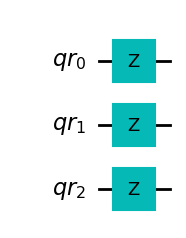

In [18]:
circuit_U = QuantumCircuit(qr)
circuit_U.z(qr)

U_gate = circuit_U.to_gate().control(1,ctrl_state= 1)
circuit_U.draw('mpl')

Creamos el circuito con el operador controlado

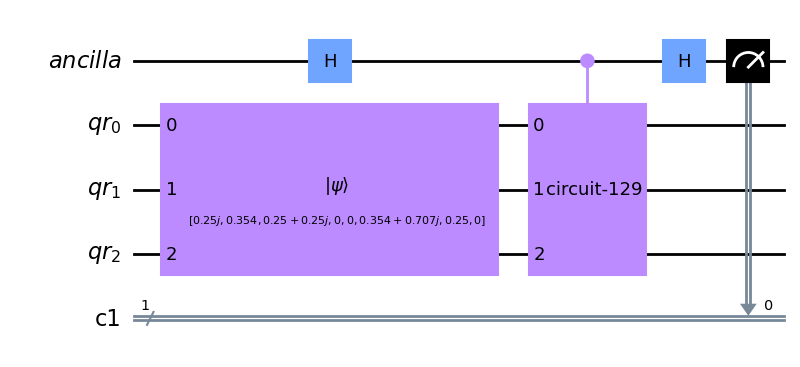

In [19]:
circuit_Had = QuantumCircuit(qra, qr, cr)
circuit_Had.initialize(input_vector,qr)

circuit_Had.h(qra)  
circuit_Had.append(U_gate, qra[:] + qr[:])
circuit_Had.h(qra)

circuit_Had.measure(qra,cr)

circuit_Had.draw('mpl')

In [20]:
# transpilamos
t_circuit_Had = transpile(circuit_Had, backend = simulador)

# Ejecutamos la simulación con 1000 shots 
result_circuit_Had = simulador.run(t_circuit_Had, shots = 10000).result()
counts_circuit_Had = result_circuit_Had.get_counts()
counts_circuit_Had

{'1': 2532, '0': 7468}

In [21]:
val_esp_sigma(counts_circuit_Had)

(0.49360000000000004, 0.86969)